In [4]:
import pandas as pd

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import numpy as np
from scipy.stats import  spearmanr

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler,  PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, train_test_split, GridSearchCV, KFold

In [5]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor

В соответствии с комментариями создателей кейса, значения признаков 'Исток не вернул выдох', 'Древний Ветер развеялся' следует интерпретировать как пропуски

In [6]:
ds = pd.read_csv('data.csv', na_values = ['Исток не вернул выдох', 'Древний Ветер развеялся'])
ds.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,NaN,1.096,1.394603,5.947,NaN,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,NaN,1.389,1.394603,7.574,NaN,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,NaN,1.658,1.394603,9.007,NaN,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975


In [7]:
features = ds.columns.to_list()
features.remove('Гармония Бессмертия')
features.insert(0,'Гармония Бессмертия') # переместил результирующий признак вперед для более удобной работы
ds = ds.reindex(columns = features)

In [8]:
ds.dtypes

Гармония Бессмертия               float64
Вектор Мощи                       float64
Скорость перехода через портал    float64
Приток Силы Потока                float64
Ритм магического ядра             float64
Поток Энергий                     float64
Сила Левого Потока                float64
Сила Правого Потока               float64
Пламя Стихий                      float64
Температура вдоха Истока            int64
Температура выдоха Истока         float64
Приток давления Выдоха Истока     float64
Давление вдоха Истока             float64
Давление выдоха Истока            float64
Древний Ветер                     float64
Печать Чародея                    float64
Эмульсия Истока                   float64
Дыхание Истока                    float64
dtype: object

In [9]:
ds.describe()

,Гармония Бессмертия,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока
count,11934.0000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,2387.000000,11934.000000,1.193400e+04,11934.000000,2387.000000,11934.000000,11934.000000,11934.00000
mean,0.9875,5.166667,7.716600,27247.498685,223.711688,8200.947312,227.335768,227.335768,735.495446,736.0,646.092576,2.352963,1.394603e+00,12.297123,1.029413,33.641261,0.662440,0.97500
std,0.0075,2.626388,3.985002,22148.613155,81.061874,1091.315507,200.495889,200.495889,173.680552,0.0,71.394305,1.084770,2.806761e-13,5.337448,0.010217,25.841363,0.507132,0.01472
min,0.9750,1.138000,1.543320,253.547000,136.939406,6589.002000,5.304000,5.304000,442.364000,736.0,542.994000,1.093000,1.394603e+00,5.828000,1.019000,0.000000,0.068000,0.95000
25%,0.9810,3.144000,4.629960,8375.883750,145.220958,7058.324000,60.317000,60.317000,589.872750,736.0,579.362000,1.389000,1.394603e+00,7.447250,1.020000,13.677500,0.246000,0.96200
50%,0.9875,5.140000,7.716600,21630.659000,201.514947,8482.081500,175.268000,175.268000,706.038000,736.0,636.963000,2.083000,1.394603e+00,11.092000,1.026000,25.276500,0.496000,0.97500
75%,0.9940,7.148000,10.803240,39001.426750,280.447777,9132.606000,332.364750,332.364750,834.066250,736.0,692.152000,2.981000,1.394603e+00,15.658000,1.036000,44.552500,0.882000,0.98800
max,1.0000,9.300000,13.889880,72784.872000,372.879926,9797.103000,645.249000,645.249000,1115.797000,736.0,788.433000,4.560000,1.394603e+00,23.140000,1.052000,92.556000,1.832000,1.00000


In [10]:
len(ds)

11934

In [11]:
ds['Давление вдоха Истока'].unique() 

array([1.394603])

In [12]:
ds['Температура вдоха Истока'].unique()

array([736], dtype=int64)

Температура вдоха истока имеет постоянную температуру 736, давление вдоха истока для всех значений равно 1.394603
Вследствие этого данные признаки не влияют на целевую переменную и их следует исключить из рассмотрения

In [13]:
len(ds[ds['Сила Левого Потока'] == ds['Сила Правого Потока']])

11934

Признаки "Сила левого потока" и "Сила правого потока" абсолютно идентичны, поэтому использовать оба признака в модели бессмысленно.
В дальнейшем с их помощью будет рассчитан новый признак, а они сами будут удалены

In [14]:
ds.isnull().sum()

Гармония Бессмертия                  0
Вектор Мощи                          0
Скорость перехода через портал       0
Приток Силы Потока                   0
Ритм магического ядра                0
Поток Энергий                        0
Сила Левого Потока                   0
Сила Правого Потока                  0
Пламя Стихий                         0
Температура вдоха Истока             0
Температура выдоха Истока         9547
Приток давления Выдоха Истока        0
Давление вдоха Истока                0
Давление выдоха Истока               0
Древний Ветер                     9547
Печать Чародея                       0
Эмульсия Истока                      0
Дыхание Истока                       0
dtype: int64

У признаков "Температура выдоха Истока" и "Древний Ветер" более 9500 пропусков, заменять их на среднее/медиану или 0 будет некорректно, поэтому имеет смысл исключить их из рассмотрения

### Создание новых признаков
(В соответствии с указаниями в ТЗ)

In [15]:
ds['Общая мощность потоков'] = ds['Сила Левого Потока'] + ds['Сила Правого Потока']
ds['Полная общая мощность потоков'] = ds['Общая мощность потоков'] + ds['Приток Силы Потока']
ds['Общая сила ядра'] = ds['Ритм магического ядра']*ds['Приток Силы Потока']
ds['Общее давление на выходе'] = ds['Приток давления Выдоха Истока'] + ds['Давление выдоха Истока']
ds['Магическая производительность'] = ds['Скорость перехода через портал']/ds['Эмульсия Истока']
ds['Эффективность ядра'] = ds['Общая сила ядра']/ds['Эмульсия Истока']
ds['Магическая мощность'] = ds['Эмульсия Истока']*ds['Общее давление на выходе']*(ds['Пламя Стихий']-ds['Температура вдоха Истока'])
ds['Степень износа магических источников'] = ds['Дыхание Истока']/ds['Гармония Бессмертия'] # признак рассчитывается через целевое значение!
ds['Расхождение в стабильности магии'] = abs(ds['Дыхание Истока'] - ds['Гармония Бессмертия']) # признак рассчитывается через целевое значение!
ds['Баланс угасания'] = ds['Расхождение в стабильности магии']/ds['Скорость перехода через портал'] # признак рассчитывается через целевое значение!

### Удаление неинформативных признаков

In [16]:
ds.drop(['Температура выдоха Истока','Температура вдоха Истока',
         'Давление вдоха Истока','Древний Ветер',
         'Сила Правого Потока', 'Сила Левого Потока' ], axis = 1, inplace = True)

In [17]:
len(ds.columns) # всего 22 признака, один из которых - целевой

22

## Анализ признаков

### Гистограммы распределения

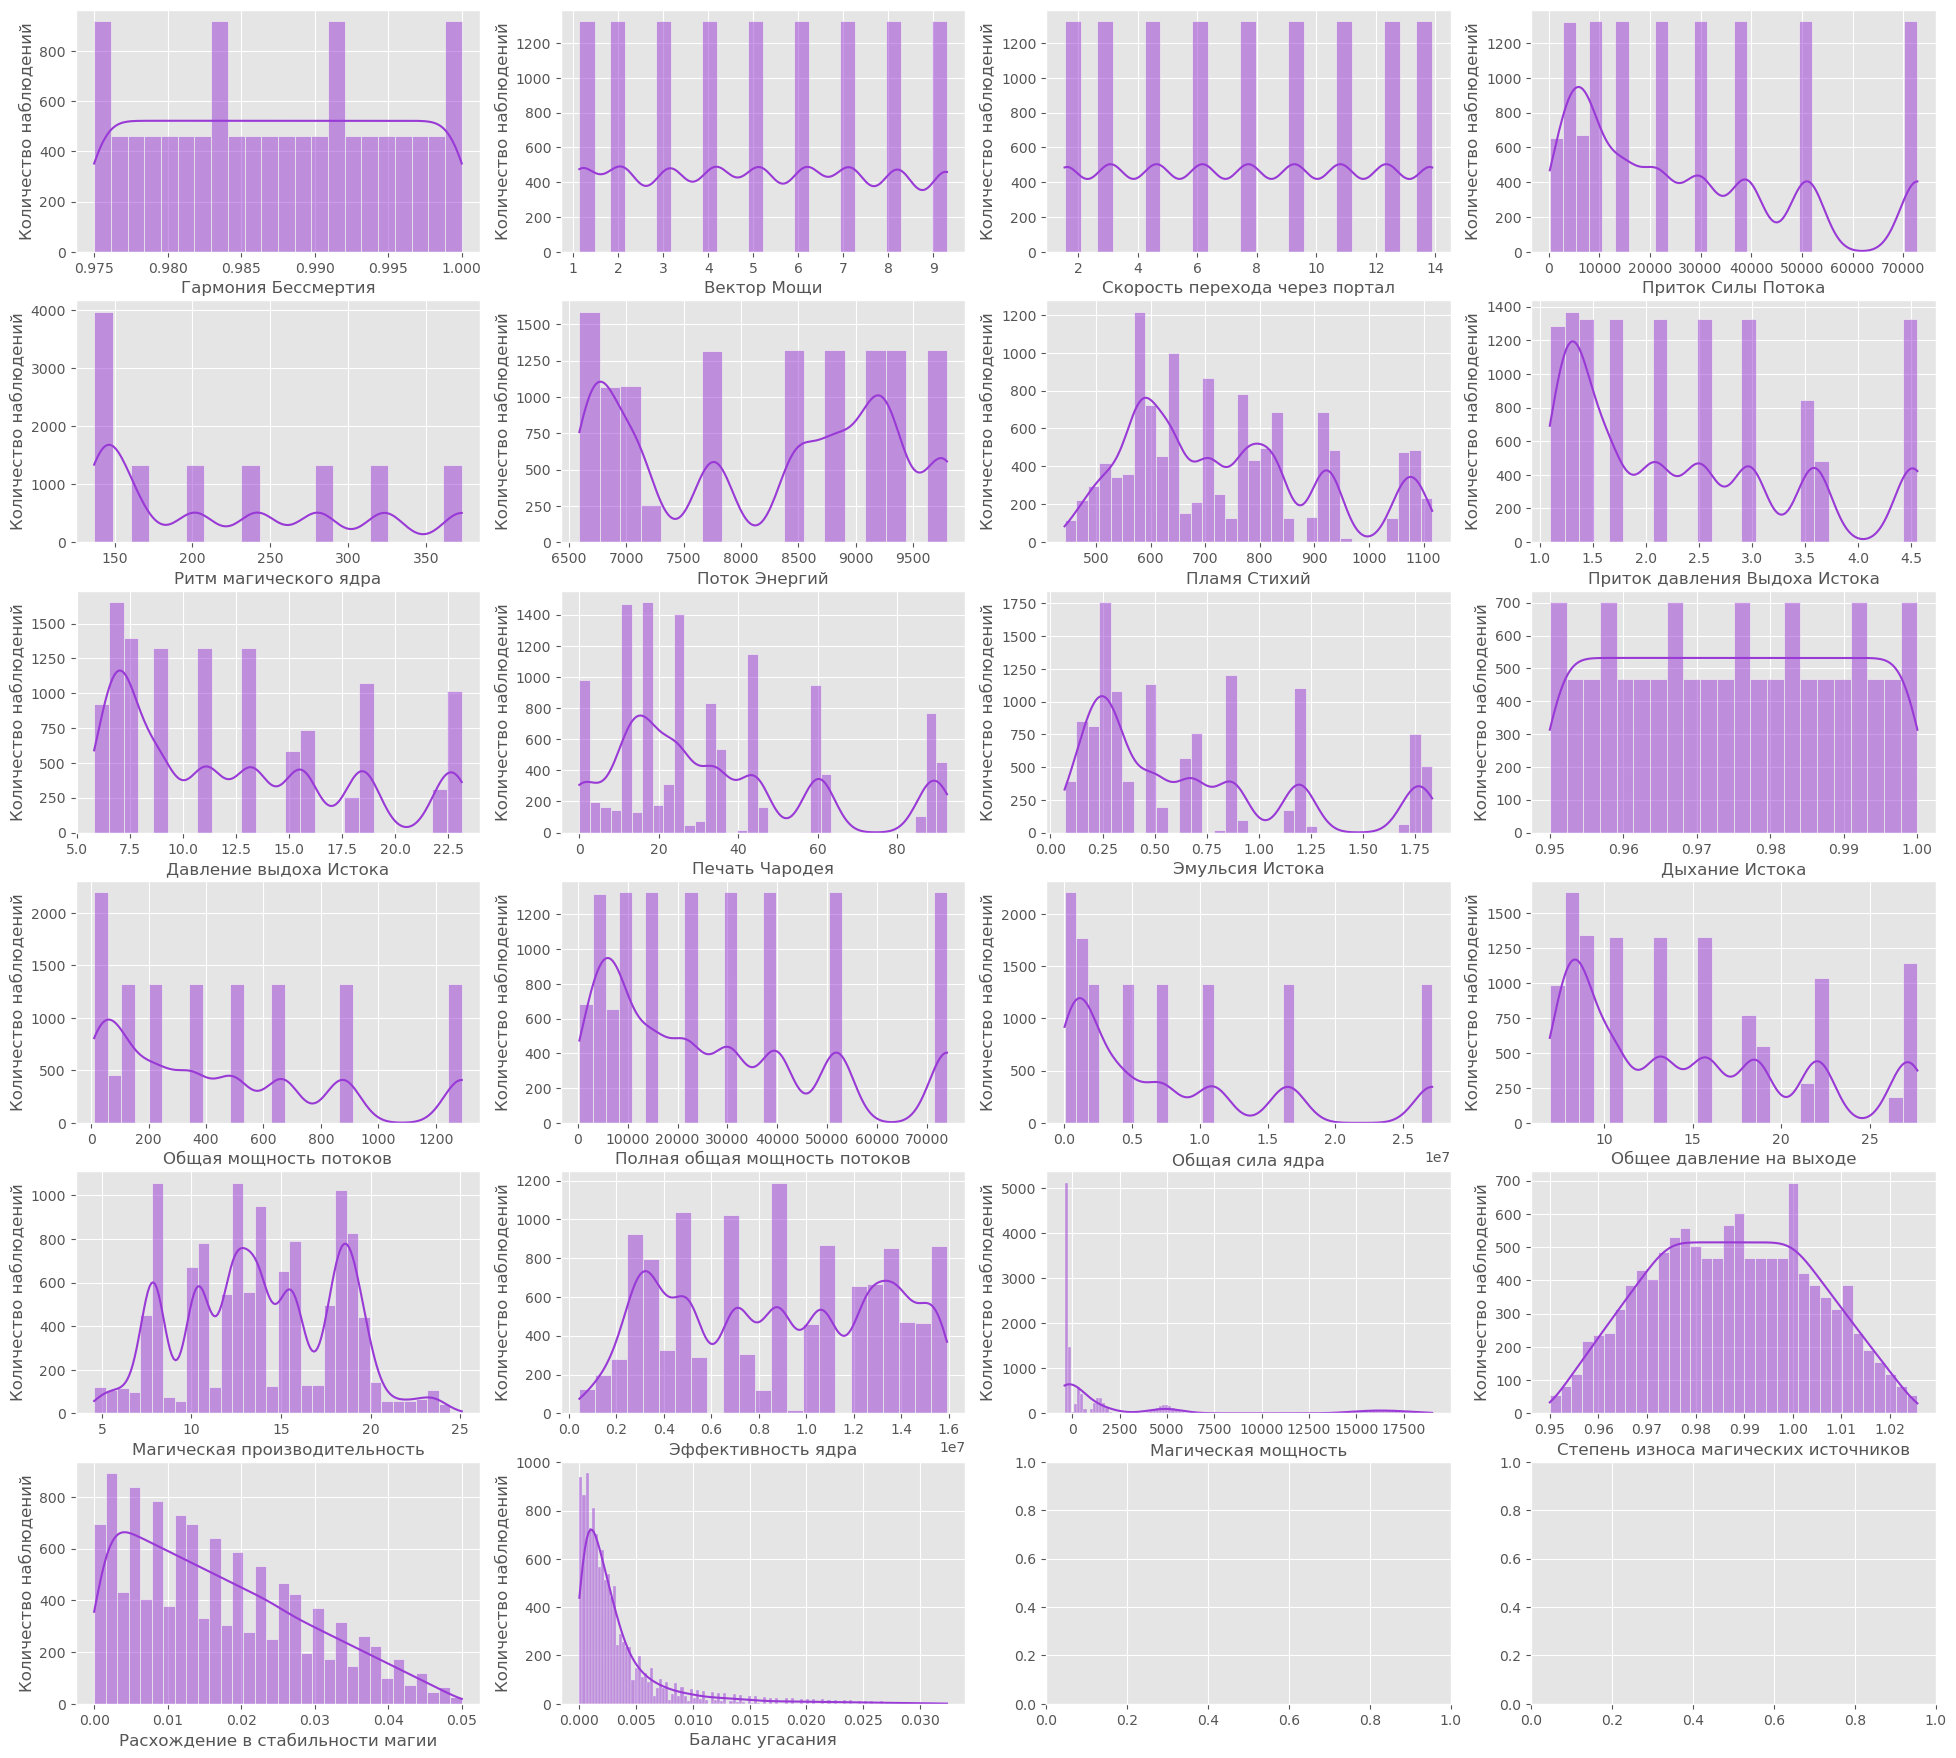

In [87]:
m = 6
n = 4
factors = ds.columns
fig, axes = plt.subplots(m, n, figsize=(24, 22))
k = 0
for i in range(m):
    for j in range(n):
            sns.histplot(ax = axes[i,j], data = ds, x = factors[k], color = '#9939d6', kde = True)
            axes[i,j].set_ylabel('Количество наблюдений', fontsize = 12)
            axes[i,j].set_xlabel(factors[k], fontsize = 12)
            k+=1
            if k >= 22:
                break

plt.show()

Распределение большинства признаков имеет кусочный вид.   
Распределение признака "Дыхание истока" визуально похож на распределение целевой переменной.  
Целевой признак - гармония бессмертия, его распределение близко к равномерному за исключением некоторых значений.  
Распределение признака "Баланс угасания" и "Магическая мощность" близко к экспоненциальному или логнормальному

In [18]:
for i in ds.columns:
    print(f' {i} {ds[i].nunique()} значений')

 Гармония Бессмертия 26 значений
 Вектор Мощи 9 значений
 Скорость перехода через портал 9 значений
 Приток Силы Потока 11430 значений
 Ритм магического ядра 3888 значений
 Поток Энергий 11834 значений
 Пламя Стихий 11772 значений
 Приток давления Выдоха Истока 524 значений
 Давление выдоха Истока 4209 значений
 Печать Чародея 8496 значений
 Эмульсия Истока 696 значений
 Дыхание Истока 51 значений
 Общая мощность потоков 4286 значений
 Полная общая мощность потоков 11567 значений
 Общая сила ядра 11859 значений
 Общее давление на выходе 5678 значений
 Магическая производительность 770 значений
 Эффективность ядра 11933 значений
 Магическая мощность 11934 значений
 Степень износа магических источников 1301 значений
 Расхождение в стабильности магии 51 значений
 Баланс угасания 337 значений


Целесообразно рассматривать признаки вектор мощи и Скорость перехода через портал как категориальные 

In [20]:
ds['Вектор Мощи'] = ds['Вектор Мощи'].astype('object')
ds['Скорость перехода через портал'] = ds['Скорость перехода через портал'].astype('object')

### Анализ выбросов и аномальных значений

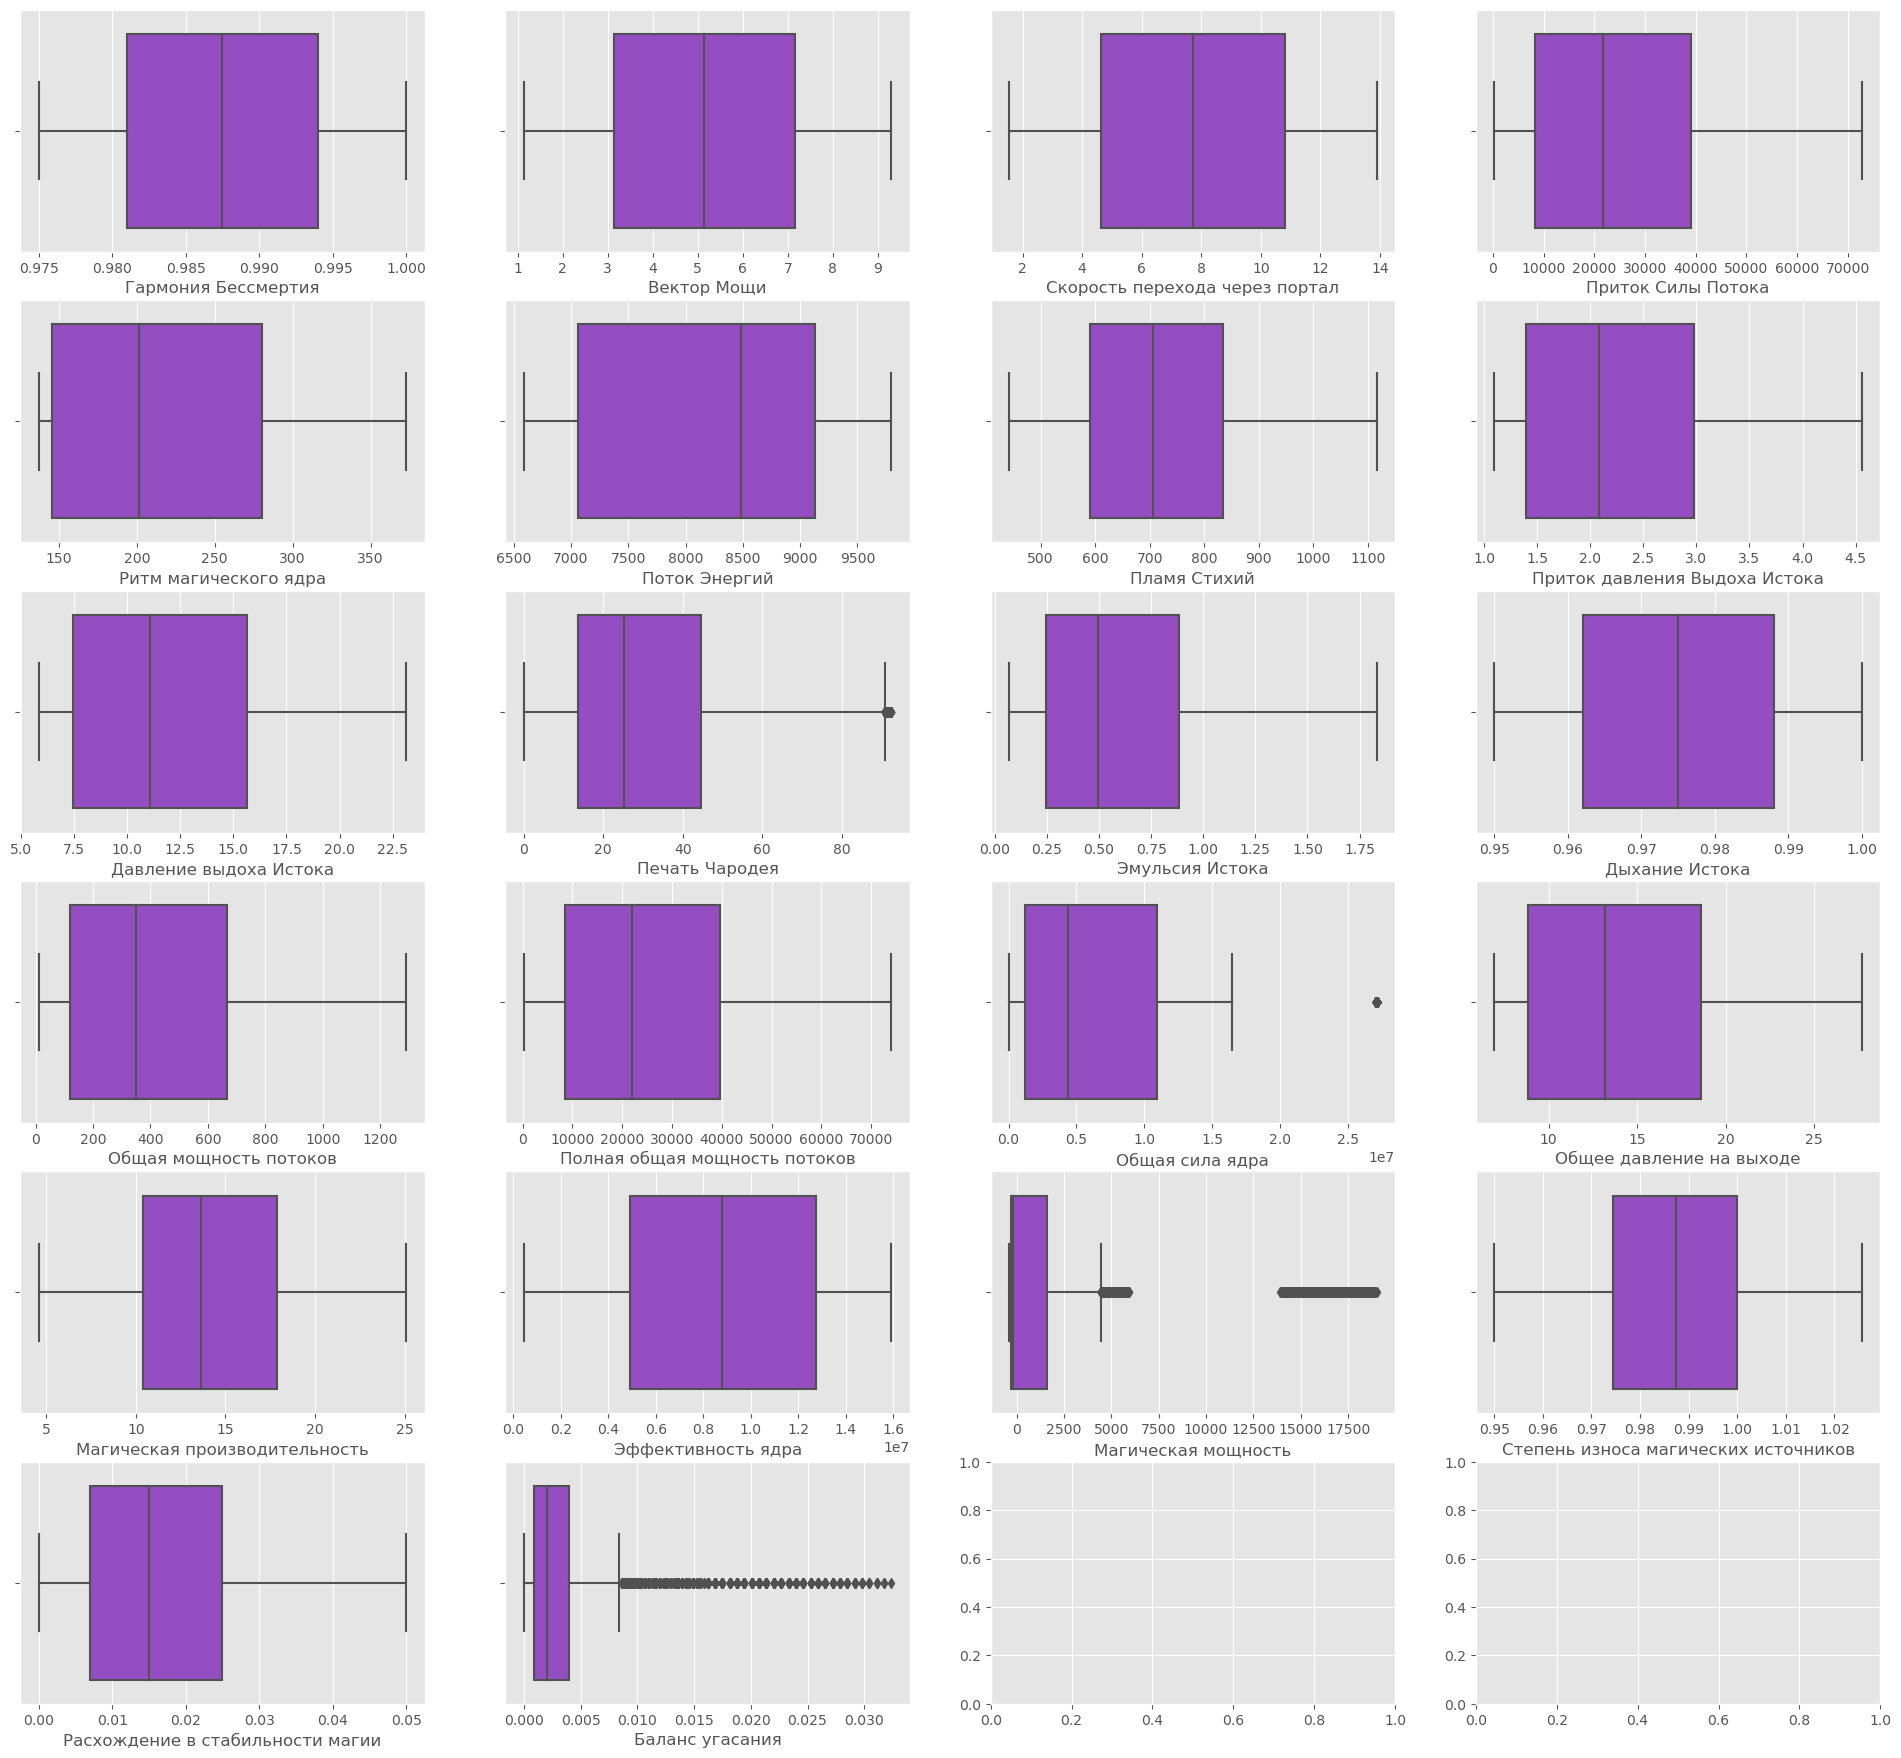

In [21]:
m = 6
n = 4
factors = ds.columns
fig, axes = plt.subplots(m, n, figsize=(24, 22))
k = 0
for i in range(m):
    for j in range(n):
            sns.boxplot(ax = axes[i,j], data = ds, x = factors[k], color = '#9939d6')
            axes[i,j].set_xlabel(factors[k], fontsize = 12)
            k+=1
            if k >= 22:
                break

plt.show()

По результатам анализа "Ящиков с усами" были выявлены выбросы у признаков Печать чародея, общая сила ядра, магическая мощность и баланс угасания

In [19]:
ds[['Печать Чародея', 'Общая сила ядра','Баланс угасания']].describe() 

,Печать Чародея,Общая сила ядра,Баланс угасания
count,11934.000000,1.193400e+04,11934.000000
mean,33.641261,7.872392e+06,0.003444
std,25.841363,8.488915e+06,0.004355
min,0.000000,3.556916e+04,0.000000
25%,13.677500,1.216337e+06,0.000907
50%,25.276500,4.358900e+06,0.002036
75%,44.552500,1.093774e+07,0.003996
max,92.556000,2.714001e+07,0.032398


In [25]:
len(ds)

11934

In [27]:
ds_no_outliers = pd.DataFrame()
for column in ds.columns:
    Q1 = ds[column].quantile(0.25)
    Q3 = ds[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ds_no_outliers[column] = ds[(ds[column] >= lower_bound) & (ds[column] <= upper_bound)][column]
ds_no_outliers = ds_no_outliers.dropna()
len(ds_no_outliers)

8408

### Многомерный анализ

In [20]:
def spearman_test(data_1, data_2):
    correlation = spearmanr(data_1, data_2)
    return '{0:.2f}\n{1:.2f}'.format(*correlation)

Первое число в корреляционной матрице показывает линейную корреляцию между признаками    
Второе число - p-value, говорящее о значимости/незначимости показателя. В данном случае при уровне значимости 0.05 все показатели, имеющие p-value>0.05, являются незначимыми

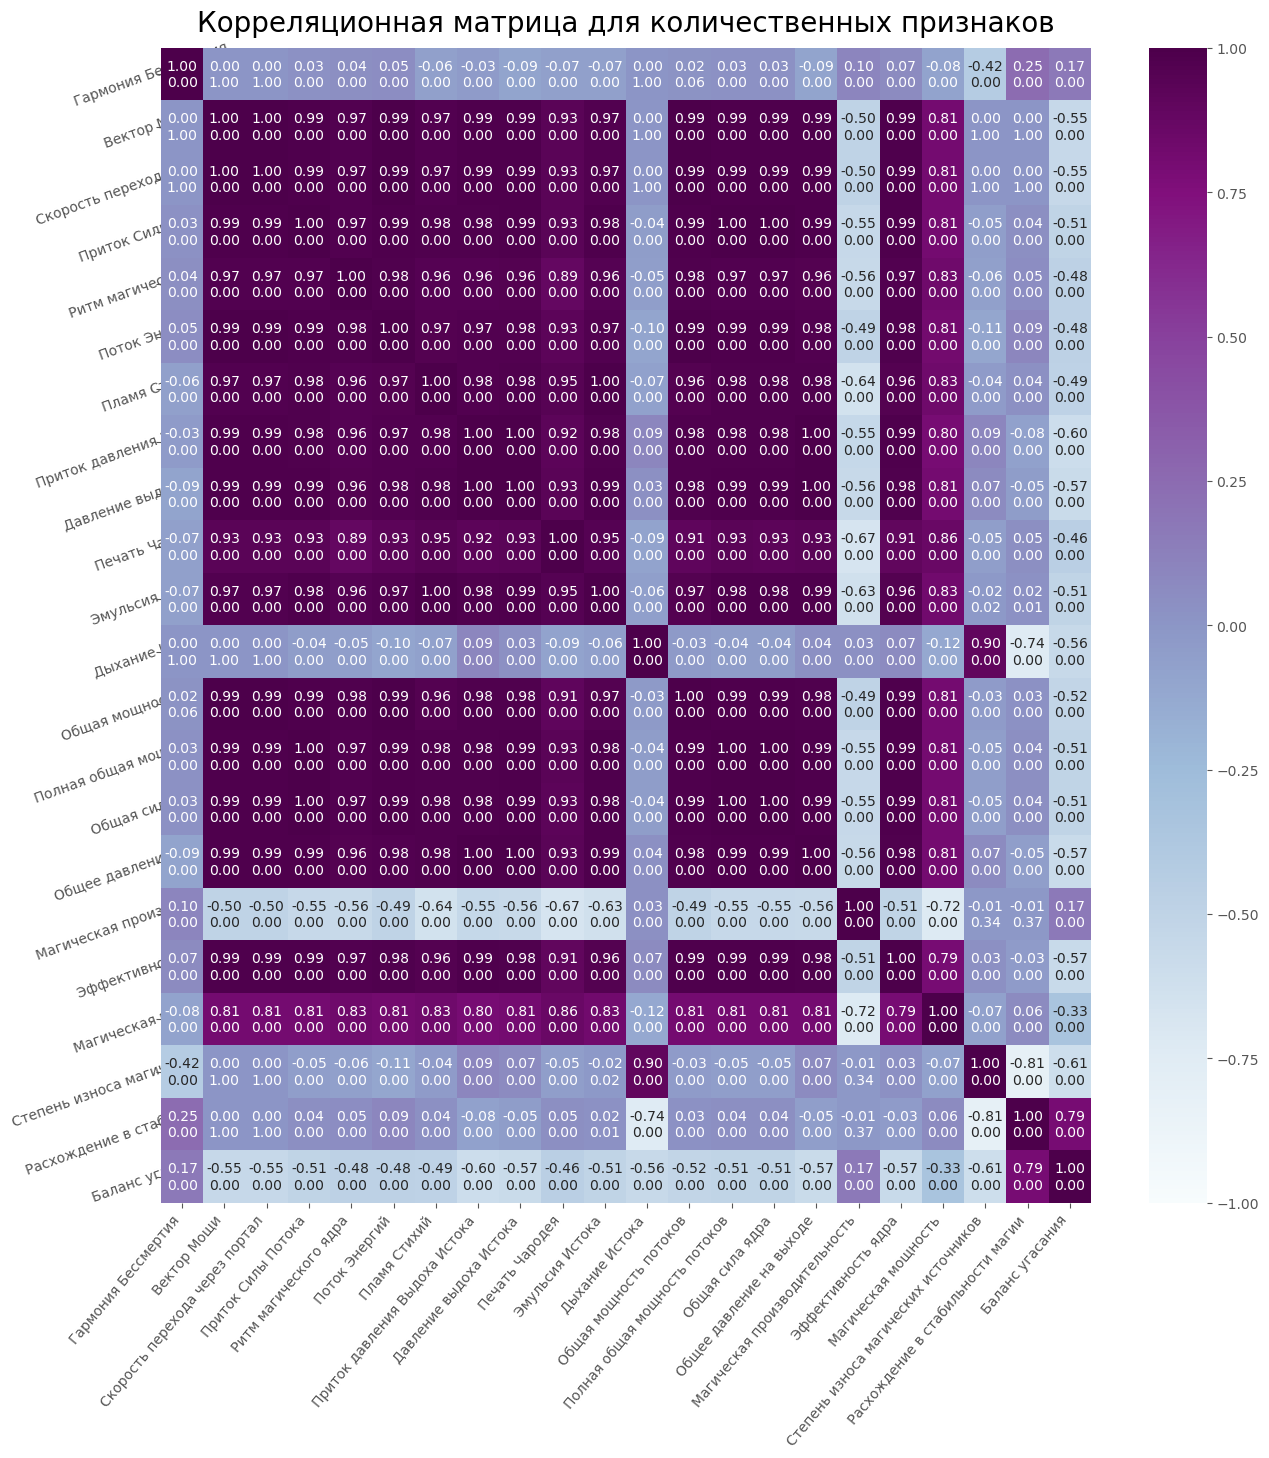

In [90]:
correlation = ds.corr(method = 'spearman')
text = [[spearman_test(ds[i], ds[j]) for i in ds.columns] for j in ds.columns]
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1,  annot=text, fmt='', cmap='BuPu'
)
heatmap.set_title('Корреляционная матрица для количественных признаков', fontdict={'fontsize':20}, pad=12)
heatmap.set_xticklabels(ds.columns, rotation = 50, ha='right')
heatmap.set_yticklabels(ds.columns, rotation = 20, ha ='center')
plt.show()

Признаки 'Вектор Мощи', 'Скорость перехода через портал','Приток Силы Потока', 'Ритм магического ядра', 'Поток Энергий','Пламя Стихий', 'Приток давления Выдоха Истока','Давление выдоха Истока', 'Печать Чародея', 'Эмульсия Истока', 'Общая мощность потоков','Полная общая мощность потоков', 'Общая сила ядра','Общее давление на выходе', 'Эффективность ядра' и 'Магическая мощность' имеют корреляцию друг с другом, близкую к 1, в связи с этим в **линейных моделях** имеет смысл использовать только один из них, либо применять L1/L2 регуляризацию

## Обучение модели

### Разбиение на обучающую и тестовую выборки

In [35]:
range_scale = ds.columns.to_list()
metric = range_scale[:-3]
metric.remove('Вектор Мощи')
metric.remove('Скорость перехода через портал')# Последние 3 признака основаны на целевой переменной, поэтому использовать их в модели неправильно

In [40]:
def scores(reg, X_train, y_train, X_test, y_test): #функция расчета метрик качества модели для обучающей и тестовой выборок
    pred_train = reg.predict(X_train)
    pred_test = reg.predict(X_test)
    metrics = pd.DataFrame(
        [[mean_absolute_error(y_train, pred_train),
          mean_absolute_error(y_test, pred_test)],
         [mean_squared_error(y_train, pred_train),
          mean_squared_error(y_test, pred_test)],
          [np.sqrt(mean_squared_error(y_train, pred_train)),
          np.sqrt(mean_squared_error(y_test, pred_test))],
         [r2_score(y_train, pred_train),
          r2_score(y_test, pred_test)]],
        columns=['Train', 'Test'],
        index=['MAE', 'MSE', 'RMSE', 'R2'])
    return metrics

In [36]:
X_train, X_test, y_train, y_test = train_test_split( 
    ds[metric].drop('Гармония Бессмертия', axis = 1),
    ds['Гармония Бессмертия'],
    test_size=0.3,
    random_state=22)

В результате построения линейных моделей с ограниченным числом признаков в связи с мультиколлинеарностью были получены неудовлетворительные результаты.   
Было принято решение перейти к построению нелинейных моделей.   
Лучше всего себя показали ансамблевые методы, а именно **случайный лес**

После построения базовой модели случайного леса, была проведена валидация параметров и была выявлена лучшая их комбинация 

In [42]:
rf_model = RandomForestRegressor(random_state=5,
                               max_depth = 20, # Т.к. алгоритм случайного леса не меняет смещение и снижает разброс, 
                               min_samples_split = 5, #целесообразно брать достаточно большую гулбину одного дерева
                               n_estimators = 500 
                              
                               )
rf_model.fit(X_train, y_train)
rf_scores_model = scores(rf_model, X_train, y_train, X_test, y_test)
rf_scores_model

,Train,Test
MAE,1.701867e-04,3.641942e-04
MSE,1.356455e-07,5.636260e-07
RMSE,3.683008e-04,7.507503e-04
R2,9.975820e-01,9.900415e-01


При создании этой модели удалось избежать переобучения, точность предсказания очень хорошая. MSE = 0.0000045, R^2 = 0.992   
Это говорит о хороших прогностических качествах модели

**Проанализируем влияние признаков на точность прогноза, чтобы исключить менее значимые признаки и упростить модель**

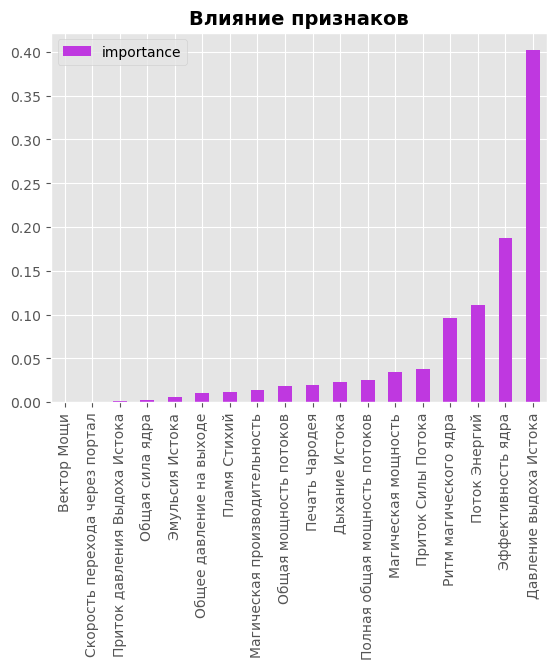

In [94]:
data = pd.DataFrame(
    rf_model.feature_importances_.tolist(),
    index=ds[metric[1:]].columns,
    columns=['importance']
).sort_values('importance')

data.plot.bar(color = '#bf38e0')
plt.title('Влияние признаков',fontsize=14, fontweight="bold")
plt.show()

In [95]:
keys = ds[metric].columns.tolist()[1:]
values = rf_model.feature_importances_.tolist()
d = {keys[i]: values[i] for i in range(len(keys))}

**Будем считать, что мы хотим потерять не более 10% влияния признаков**

In [105]:
sorted_values = rf_model.feature_importances_.tolist()
sorted_values.sort()
i = 1
k = 0
while k < 0.1:
    k = sum(sorted_values[:i])
    i+=1
print(f'Оптимальное количество признаков для исключения: {i-1}\nПотерянное влияние: {round(k,3)}')  

Оптимальное количество признаков для исключения: 11
Потерянное влияние: 0.105


In [121]:
import itertools
sorted_dict = dict(sorted(d.items(), key=lambda item: item[1]))
final_dict = dict(list(sorted_dict.items())[11:])

Рассматривая смысл этих признаков, выясняется, что 'Полная общая мощность потоков' зависит от Общей мощности потоков и Притока силы истока, которые также присутствуют в списке наиболее влиятельных признаков   
В связи с этим, исключим признак 'Полная общая мощность потоков'  
Также признаки магическая мощность и приток силы потока вносят достаточно слабый вклад в модель, поэтому они тоже будут исключены


In [113]:
del final_dict['Полная общая мощность потоков']
del final_dict['Магическая мощность']
del final_dict['Приток Силы Потока']

## Построение модели с меньшим количеством признаков

In [115]:
metric_new = list(final_dict.keys())
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split( 
    ds[metric_new],
    ds['Гармония Бессмертия'],
    test_size=0.3,
    random_state=22)

In [116]:
rf_model_new = RandomForestRegressor(random_state=5,
                               max_depth = 20, # Т.к. алгоритм случайного леса не меняет смещение и снижает разброс, 
                               min_samples_split = 5, #целесообразно брать достаточно большую гулбину одного дерева
                               n_estimators = 500
                              
                               )
rf_model_new.fit(X_train_new, y_train_new)
rf_scores_model_new = scores(rf_model_new, X_train_new, y_train_new, X_test_new, y_test_new)

In [117]:
rf_scores_model_new['Delta Train'] = rf_scores_model_new['Train']/rf_scores_model['Train']
rf_scores_model_new['Delta Test'] =rf_scores_model_new['Test']/rf_scores_model['Test']

In [118]:
rf_scores_model_new

,Train,Test,Delta Train,Delta Test
MAE,0.0002081,0.0004271,1.2236310,1.1724261
MSE,0.0000003,0.0000009,2.0297235,1.6746024
RMSE,0.0005256,0.0009722,1.4246837,1.2940643
R2,0.9950753,0.9832983,0.9974955,0.9932041


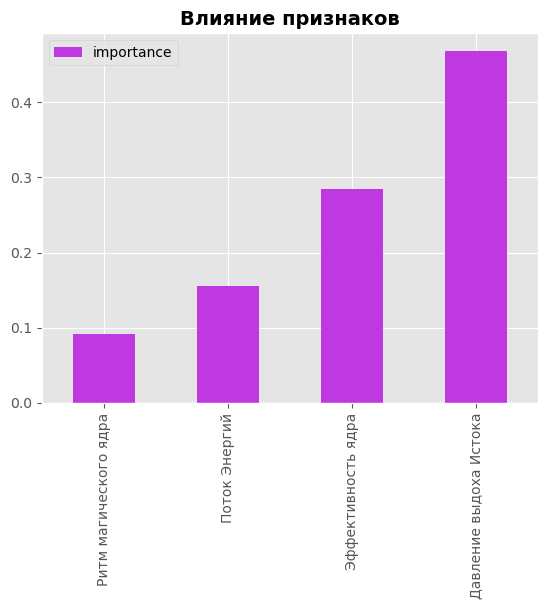

In [120]:
data_new = pd.DataFrame(
    rf_model_new.feature_importances_.tolist(),
    index=ds[metric_new].columns,
    columns=['importance']
).sort_values('importance')

data_new.plot.bar(color = '#bf38e0')
plt.title('Влияние признаков',fontsize=14, fontweight="bold")
plt.show()

В результате обучения модели с меньшим количеством признаков получили на тестовой выборке увеличение MAE на 17%, MSE на 67%, RMSE на 29%, а также незначительное увеличение R^2   
Это говорит о том, что избыточность признаков может негативно влиять на качество модели

# Выводы

1. При анализе датасета был исключен ряд признаков:   
   * _Температура вдоха истока и Давление вдоха истока, т.к. они являются константой_   
   * _Температура выдоха Истока и Древний ветер, т.к. они имели слишком большое количество пропусков_   
   * _Сила Левого Потока и Сила Правого Потока, т.к. они были равны друг другу и участвовали в создании нового признака_   
   * _Степень износа магических источников,Расхождение в стабильности магии и Баланс угасания, т.к. они рассчитаны на основе целевой переменной_   
2. Распределения признаков не похожи на нормальное распределение (как графически, так и статистически)  

3. Выбросы у используемых при построении моделей признаков не являются ошибкой, а описывают специфику признака   
   
4. По корреляционной матрице выявлена сильная **мультиколлинеарность** большинства признаков, что не позволило использовать линейные модели прогноза   
   
5. Для построения лучшей модели был использован ансамблевый метод **Случайный лес**, после валидации были выбраны лучшие параметры, дающие наиболее устойчивый результат:  
   * _Глубина дерева - 20_
   * _Число деревьев - 500_  
   * _Минимальное число семплов для деления - 5_   

6. После построения диаграммы влияния признаков на качество прогноза было принято решение исключить из построения модели признаки, оказывающее наименьшее влияние на результат   
7. Итоговая модель была построена с использованием признаков:     
   * _'Ритм магического ядра'_   
   * _'Поток Энергий'_   
   * _'Эффективность ядра'_   
   * _'Давление выдоха Истока'_  
8. Наибольшее влияние на целевой признак "Гармония Бессметрия" оказал признак "Давление Выдоха Истока"  
9. После сокращения числа признаков метрики качества модели незначительно улучшились   
10. В результате на тестовой выборке модель показала следующие результаты:   
    * **MAE = 0.00042** 
    * **RMSE = 0.0009722**
    * **R^2 = 0.983**

# P.s. бустинг

In [45]:
from xgboost import XGBRegressor

In [47]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split( 
    ds[metric].drop('Гармония Бессмертия', axis = 1),
    ds['Гармония Бессмертия'],
    test_size=0.3,
    random_state=22)

In [ ]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

In [50]:
grid_n = {'learning_rate': [0.0001, 0.001, 0.01, 0.1],
          'max_depth': range(1,5), 
         'n_estimators': np.arange(100,500,100)}

model_xgb = XGBRegressor( random_state=22, objective = 'reg:squarederror')
skf = KFold(n_splits=5, shuffle=True, random_state=42)
gs_n = GridSearchCV(model_xgb, grid_n, cv = skf, scoring = 'neg_mean_squared_error')
gs_n.fit(X_train_b, y_train_b)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=22, ...),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'max_depth': range(1, 5),
                         'n_estimators': array([100, 200, 300, 400])},
             scoring='neg_mean_squared_error')

In [53]:
gs_n.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 400}

In [51]:
xgb_scores = scores(gs_n, X_train_b, y_train_b, X_test_b, y_test_b)

In [52]:
xgb_scores

,Train,Test
MAE,4.373650e-04,5.678049e-04
MSE,3.404715e-07,7.084011e-07
RMSE,5.834994e-04,8.416656e-04
R2,9.939307e-01,9.874835e-01
